In [284]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [285]:
import tensorflow as tf

tf.keras.backend.clear_session()  

print(tf.__version__)

2.0.0


In [286]:
data = pd.read_csv('Datasets/data_atl_merged2.csv',parse_dates=['Date'])
data.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Date_c', 'Year',
       'Month', 'Day', 'Latitude_c', 'Longitude_c', 'Duration', 'sst', 'rhum',
       'wspd', 'slp', 'cldc'],
      dtype='object')

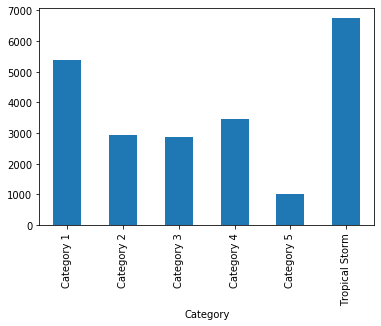

In [287]:
data = data[['ID', 'Name', 'Date','Year', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'sst', 'rhum',
       'wspd', 'slp', 'cldc']]
def category(mw):
    if mw>=137:
        return "Category 5"
    elif mw>=113:
        return "Category 4"
    elif mw>=96:
        return "Category 3"
    elif mw>=83:
        return "Category 2"
    elif mw>=64:
        return "Category 1"
    elif mw>=34:
        return "Tropical Storm"
    else:
        return "Tropical Depression"
cat_id = data.groupby('ID')['Maximum Wind'].max().apply(category)
data.loc[:,'Category']=data.ID.apply(lambda x:cat_id[x])
data.groupby('Category')['ID'].count().plot.bar();

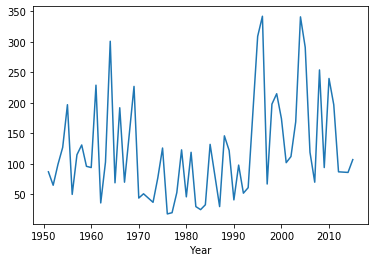

In [288]:

major_df = data[data.Category.apply(lambda x: 0 if x[-1]=='m' else int(x[-1]))>=3]
major_df.groupby('Year')['ID'].count().plot()
#Major Hurricanes by Year

In [289]:
data

,ID,Name,Date,Year,Time,Event,Status,Latitude,Longitude,Maximum Wind,sst,rhum,wspd,slp,cldc,Category
0,AL011951,UNNAMED,1951-01-02,1951,1200,NaN,EX,30.5,-58.0,50,12.371029,72.457094,72.457094,1027.446055,5.219256,Tropical Storm
1,AL011951,UNNAMED,1951-01-02,1951,1800,NaN,EX,29.9,-56.8,45,16.217764,80.423854,80.423854,1022.672978,5.756614,Tropical Storm
2,AL011951,UNNAMED,1951-01-03,1951,0,NaN,EX,29.0,-55.7,45,15.491124,81.121590,81.121590,1023.151909,5.782474,Tropical Storm
3,AL011951,UNNAMED,1951-01-03,1951,600,NaN,EX,27.5,-54.8,45,22.268075,84.264761,84.264761,1019.325138,5.651842,Tropical Storm
4,AL011951,UNNAMED,1951-01-03,1951,1200,NaN,EX,26.5,-54.5,45,22.336746,84.458617,84.458617,1019.305866,5.645406,Tropical Storm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22381,AL122015,KATE,2015-11-12,2015,1200,NaN,EX,41.3,-50.4,55,8.150870,58.920257,58.920257,1025.728740,5.537978,Category 1
22382,AL122015,KATE,2015-11-12,2015,1800,NaN,EX,41.9,-49.9,55,8.182679,59.034473,59.034473,1025.715564,5.542256,Category 1
22383,AL122015,KATE,2015-11-13,2015,0,NaN,EX,41.5,-49.2,50,7.611888,57.003590,57.003590,1025.944601,5.473615,Category 1
22384,AL122015,KATE,2015-11-13,2015,600,NaN,EX,40.8,-47.5,45,8.666978,83.324036,83.324036,1025.446874,6.021198,Category 1


In [89]:
# from math import sin, cos, sqrt, tan, atan2, radians, log, pi, degrees
# def direction(lat1,lon1,lat2,lon2):
#     lat1 = radians(lat1)
#     lat2 = radians(lat2)
#     lon1 = radians(lon1)
#     lon2 = radians(lon2)
#     d_phi = log(tan(lat2/2 + pi/4)/tan(lat1/2 + pi/4))
#     dlon = abs(lon1 - lon2)%180
#     d = atan2(dlon, d_phi) 

#     return degrees(d)

In [88]:
# for i in range(1,len(data)):
#     data.loc[i,'Dir'] = direction(data.loc[i,'Latitude'],data.loc[i,'Longitude'],
#                                   data.loc[i-1,'Latitude'],data.loc[i-1,'Latitude'])
# data.Dir.hist(bins = 10)

In [148]:
# data_coords = data.copy()
# for i in range(len(data_coords)-1):
#     if abs(data_coords.loc[i+1,'Time']-data_coords.loc[i,'Time'])%600!=0:
#         if data_coords.loc[i+1,'ID']==data_coords.loc[i,'ID']:
#             print(i,data_coords.loc[i+1,'Time']-data_coords.loc[i,'Time'])

In [290]:
def min_max_scale(data,cols):
    df = data.copy()
    for col in cols:
        min_ = df[col].min()
        max_ = df[col].max()
        df.loc[:,col] = (df[col]-min_)/(max_-min_)
    return df[cols]

# data2 = min_max_scale(data,['Latitude','Longitude'])
# data2[['Latitude','Longitude']].describe()

In [291]:
data.loc[:,'Time_new']=data.Date+data.Time.map(lambda x: pd.Timedelta(hours=x/100))
def split(df):
    st=[]
    temp_df = pd.DataFrame(df.loc[0,:]).transpose().copy()
    ID = df.loc[0,'ID']
    for i in range(1,len(df)):
        if df.loc[i,'ID']==ID:
            temp_df = pd.concat([temp_df,pd.DataFrame(df.loc[i,:]).transpose()],ignore_index=True)
        else:
            st.append(temp_df)
            del temp_df
            temp_df = pd.DataFrame(df.loc[i,:]).transpose().copy()
            ID = df.loc[i,'ID']
    return st
splitted = split(data)

In [292]:
print(len(splitted))

684


In [160]:
messy = []
for j,h in enumerate(splitted):
    for i in range(len(h)-1):
        if h.iloc[i+1,16]-h.iloc[i,16]>pd.Timedelta(hours=6):
            if j not in messy:
                messy.append(j)
# split[0].iloc[2,9]-split[0].iloc[1,9]==pd.Timedelta(hours=6)
print(len(messy))
# splitted[messy[0]]
# len(data.columns)

0


In [83]:
split2[0].index!=1

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [293]:


def clean_data(df):
    df2 = df.copy()
    df2.loc[:,'Hours'] = (df2.loc[:,'Time_new']-pd.Timestamp(1951,1,1))/pd.Timedelta('1 hour')
    df2 = df2[['Hours','Latitude','Longitude','Maximum Wind']]
    return min_max_scale(df2,['Hours','Latitude','Longitude','Maximum Wind'])
# def prepare_data(df):
#     for i in range(1,len(df)-6):
#         x.append(np.array([df.Latitude[i],df.Latitude[i+1],df.Latitude[i+2],
#                           df.Longitude[i],df.Longitude[i+1],df.Longitude[i+2]]))
#         y.append(np.array([df.Latitude[i+6],df.Longitude[i+6]]))
#     return np.array(x),np.array(y)
# x,y = prepare_data(data2)
def shift_data(df,shift = 3,pred = 1):
#     x = df.iloc[:-shift]
#     y = df.iloc[shift:]
    x = []
    y = []
    df = df.set_index(np.arange(0,len(df)))#.drop('ID',axis = 1)
    for i in range(0,len(df)-shift):#,shift):
        x_arr = []
        y_arr = []
        for j in range(i,i+shift):
            x_arr.append(df.loc[j,:])
        y.append(np.array(df.loc[i+shift:i+shift+pred-1,['Latitude','Longitude']]).ravel())
        x.append(np.array(x_arr))
       
    return np.array(x),np.array(y)

In [282]:
data_cleaned = clean_data(data)
data_cleaned.describe()

,Hours,Latitude,Longitude,Maximum Wind
count,22386.000000,22386.000000,22386.000000,22386.000000
mean,0.548738,0.274618,0.270998,0.268019
std,0.300931,0.141621,0.117657,0.162955
min,0.000000,0.000000,0.000000,0.000000
25%,0.286145,0.161247,0.179919,0.129032
50%,0.596755,0.268293,0.264074,0.225806
75%,0.826493,0.363144,0.354034,0.354839
max,1.000000,1.000000,1.000000,1.000000


In [295]:
n = len(data_cleaned) ## 70% train, 20% validation and 10% test
train_df = data_cleaned.loc[0:int(n*0.7),:]
val_df = data_cleaned.loc[int(n*0.7):int(n*0.9),:]
test_df = data_cleaned.loc[int(n*0.9):,:]

xtrain,ytrain = shift_data(train_df)
xval,yval = shift_data(val_df)
# xtest,ytest = shift_data(test_df)

xtrain.shape,ytrain.shape,xval.shape,yval.shape,xtest.shape,ytest.shape

((15668, 3, 4), (15668, 2), (4475, 3, 4), (4475, 2), (746, 3, 4), (746, 2))

In [353]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(3,4)),
  tf.keras.layers.Dense(5, activation='sigmoid'),
#   tf.keras.layers.Dense(9, activation='sigmoid'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(2, activation='linear')
])


In [354]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['mean_squared_error'])#,'accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 65        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [355]:
%%time

# the core of the network training
history = model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=45, 
                    verbose=1)

Train on 15668 samples, validate on 4475 samples
Epoch 1/35
15668/15668 [==============================] - 2s 127us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2/35
15668/15668 [==============================] - 1s 61us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 3/35
15668/15668 [==============================] - 1s 62us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 4/35
15668/15668 [==============================] - 1s 63us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5/35
15668/15668 [==============================] - 1s 64us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 6/35
15668/15668 [==============================] - 1s 60us/sample - loss: 0.0107 - mean_squared_er

In [356]:
model.evaluate(xtest, ytest, verbose=0)

[0.023856797702510618, 0.0238568]

In [357]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

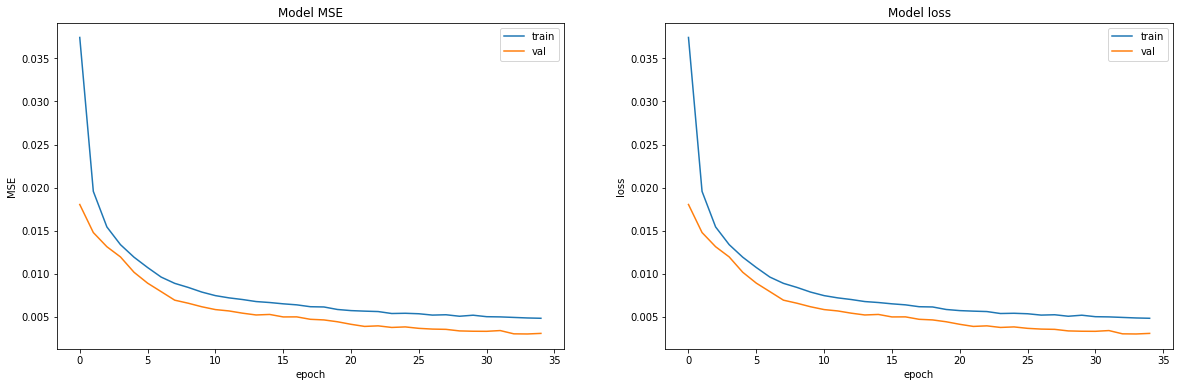

In [358]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['mean_squared_error'])
ax[0].plot(history.history['val_mean_squared_error'])
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [366]:
from sklearn.metrics import r2_score
ypred = model.predict(xtest)
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression().fit(ytest,ypred)
# lr.score(ytest,ypred)
r2_score(ytest[:,0],ypred[:,0])
ytest.shape,ypred.shape

((746, 2), (746, 2))

In [361]:
data_test = data.loc[int(n*0.9):,:]
data_test.loc[:,'Hours'] = (data_test.loc[:,'Time_new']-pd.Timestamp(1951,1,1))/pd.Timedelta('1 hour')
data_test[data_test.Category=="Category 3"]
irene = data_test[data_test.ID=='AL092011']
irene.loc[:,['Hours','Latitude','Longitude','Maximum Wind']]=min_max_scale(irene,['Hours','Latitude','Longitude','Maximum Wind'])
ir = irene.loc[:,['Hours','Latitude','Longitude','Maximum Wind']]

def predict(storm,model,shift=3,pred=1,):
    storm = storm.set_index(np.arange(0,len(storm)))
    y_pred=[]
    for i in range(0,len(storm)-shift):
        x = []
        for j in range(i,i+shift):
            x.append(storm.loc[j,:])
        y_pred.append(model.predict(np.expand_dims(np.array(x), axis=0)).ravel())
        del x
    return np.array(y_pred)
y_pred = predict(ir,model)
y_pred.shape

(40, 2)

0.757978642341187


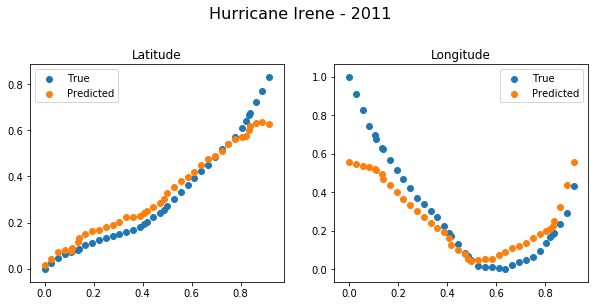

In [381]:
ir_plot = ir.iloc[0:-3,:]
fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Hurricane Irene - 2011", fontsize=16,y=1.08)
ax[0].set_title("Latitude")
ax[1].set_title("Longitude")
print(r2_score(ir_plot.Longitude,y_pred[:,1]))
ax[0].scatter(ir_plot.Hours,ir_plot.Latitude,label = 'True')
ax[0].scatter(ir_plot.Hours,y_pred[:,0],label = 'Predicted')
ax[1].scatter(ir_plot.Hours,ir_plot.Longitude,label = 'True')
ax[1].scatter(ir_plot.Hours,y_pred[:,1],label = 'Predicted')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

In [389]:
input_cols = ['Hours','Latitude','Longitude','Maximum Wind']
joaquin = data_test[data_test.ID=='AL112015']
joaquin.loc[:,input_cols]=min_max_scale(joaquin,input_cols)
y_jq = predict(joaquin[input_cols],model)

0.7548608562395955
0.7968949866484225


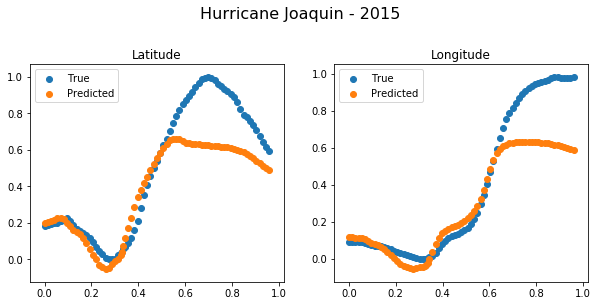

In [391]:
jq_plot = joaquin[input_cols].iloc[0:-3,:]
fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Hurricane Joaquin - 2015", fontsize=16,y=1.08)
ax[0].set_title("Latitude")
ax[1].set_title("Longitude")
print(r2_score(jq_plot.Latitude,y_jq[:,0]))
print(r2_score(jq_plot.Longitude,y_jq[:,1]))
ax[0].scatter(jq_plot.Hours,jq_plot.Latitude,label = 'True')
ax[0].scatter(jq_plot.Hours,y_jq[:,0],label = 'Predicted')
ax[1].scatter(jq_plot.Hours,jq_plot.Longitude,label = 'True')
ax[1].scatter(jq_plot.Hours,y_jq[:,1],label = 'Predicted')
ax[0].legend(loc='best')
ax[1].legend(loc='best')